# 2D Design Template

# Overview

The purpose of this project is for you to apply what you have learnt in this course. This includes working with data and visualizing it, create model of linear regression or logistic regression, as well as using metrics to measure the accuracy of your model. 

Please find the project handout description in the following link:
- [DDW-MU-Humanities Handout](https://sutdapac-my.sharepoint.com/:b:/g/personal/franklin_anariba_sutd_edu_sg/EaonbI8dXvFHr5I75zUAhGEBXflfC4aZEqtcxPYHS5Jciw?e=s6UTbq)
- [DDW-MU-SocialStudies Handout](https://sutdapac-my.sharepoint.com/:b:/g/personal/franklin_anariba_sutd_edu_sg/ETaVN6doTnJElS0Egw34XYQB_VYCwijjNk_05Ft4RctYjg?e=X8iVbw)

There are two parts.
- Part 1 is related to predicting COVID-19 deaths
- Part 2 is open ended and you can find the problem of your interest as long as it is related to COVID-19. The only requirements are the following:
    - The problem can be modelled either using Linear Regression (or Multiple Linear Regression) or Logistic Regression. This means either you are working with continous numerical data or classification. You are not allowed to use Neural Networks or other Machine Learning models.
    - You must use Python and Jupyter Notebook

The following tasks are a general guide to help you do your project for Part 2:
1. Find an interesting problem which you can solve either using Linear Regression or Classification
1. Find a dataset to build your model. You can use [Kaggle](https://www.kaggle.com/datasets) to find your datasets.
1. Use plots to visualize and understand your data.
1. Create training and test data set.
1. Build your model
1. Use metrics to evaluate your model.
1. Improve your model

## Deliverables

You need to submit this Jupyter notebook together with the dataset into Vocareum. Use the template in this notebook to work on this project.

## Rubrics

The rubrics for the scoring can be found in [this link](https://sutdapac-my.sharepoint.com/:b:/g/personal/franklin_anariba_sutd_edu_sg/EdLkuzyCrrJBp5QfVGtdHn8Bj3_epWiQMqv2mwyEei_3JQ?e=fLB0QN).

## Students Submission

Student's Name:
- Jayati Parwani
- Lee Chang Zheng
- Lisa Francis
- Harel Yee
- Jason Peng

# Part 1

#### Objective
To predict the total number of COVID-19 deaths in the next 2 weeks from a given date.

#### Predictor variables (Features) and the rationale behind choosing them


•	# Age 65+: 
People aged 65 and above (2020).
We found that COVID-19 has a strong relation to an individual’s age. Individuals aged 65 and above have a 23-fold greater risk of death than those under 65. (Mueller, McNamara, Sinclair (2020))


•	# Diabetic 20 - 79 y/o (2021). Total number of individuals with diabetes.
According to a study conducted on behalf of Brazilian Diabetes Society Study Group (SBD), diabetes is an important risk factor as well and may increase risk of mortality. 


•	popdensity: Population Density (2020).
A higher population density may suggest a higher likeliness of covid-19 spread and clusters, thus was chosen. 


•	hospitalised: Number of COVID-19 patients in hospitals on 4th March 2021.
The number of COVID-19 patients in hospitals is also an important factor as hospitalized patients are at greater risk of dying from the coronavirus as they are hospitalized due to severe Covid-19. 


#### Target (Dependent variables)


•	deaths: This represents the Number of COVID-19 deaths in the next 2 weeks. The aim of the model is to predict the cumulative number of covid-19 deaths in the two weeks following March 4, since we assumed a maximum incubation period of 14 days from hospitalization. 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def normalize_z(df):
    dfout = (df-df.mean(axis=0))/(df.std(axis=0))
    return dfout 

def get_features_targets(df, feature_names, target_names):
    df_feature = df.loc[:,feature_names]
    df_target = df.loc[:,target_names]
    return df_feature, df_target

def prepare_feature(df_feature):
    arr = df_feature.to_numpy()
    array1 = np.ones((arr.shape[0],1))
    X = np.concatenate((array1,arr),axis=1)
    return X 

def prepare_target(df_target):
    return df_target.to_numpy()

def predict(df_feature, beta):
    X = prepare_feature(normalize_z(df_feature))
    return predict_norm(X,beta)

def predict_norm(X, beta):
    y = np.matmul(X,beta)
    return y

def r2_score(y, ypred):
    y_mean = np.mean(y)
    ssres = np.sum((y-ypred)**2)
    sstot = np.sum((y-y_mean)**2)
    return 1-(ssres/sstot)

def mean_squared_error(target, pred):
    n = target.shape[0]
    mse = 1/(n) * np.sum((target-pred)**2)
    return mse

In [4]:
# Read the excel file
df =  pd.read_excel('task_1_dataset.xlsx')
display(df)

,Country,Population (2020),# Diabetic in thousands 20 - 79 y/o (2021),% Age 65+ (2020),# Age 65+,popdensity,hospitalised,deaths
0,Austria,9006398,447.1,19,1711215.62,109,1142,330
1,Bulgaria,6948445,492.1,21,1459173.45,64,5093,1311
2,Croatia,4105267,212.7,21,862106.07,73,740,162
3,Czechia,10708981,791.4,20,2141796.20,139,8482,2989
4,Denmark,5792202,309.4,20,1158440.40,137,217,23
5,Estonia,1326535,83.9,20,265307.00,31,590,135
6,France,65273511,3942.9,21,13707437.31,119,24891,3846
7,Hungary,9660351,661.4,20,1932070.20,107,6554,2152
8,Iceland,341243,20.1,16,54598.88,3,7,0
9,Israel,8655535,536.5,12,1038664.20,400,1328,247


#### Data Processing

We found that total numbers were not useful in our study, so we changed some of the variables to the following:

•	Total number of people aged 65 above per 1000 people

•	Total number of individuals with diabetes per 1000 people


We took the number of diabetic persons and elderly per 1000 people as countries with bigger populations would naturally have a higher number of diabetic and elderly people. By comparing the total number, it is effectively the same as comparing the population of a country to the number of COVID-19 deaths. This means that even if our model produced a strong correlation, it does not necessarily mean that being diabetic or old has a higher chance of causing COVID-19 deaths, but that having a larger population results in a higher COVID-19 death count. 


In [5]:
# Creating column for population in thousands
df["Population_in_1000"] = df["Population (2020)"]/1000

# Creating column for diabetic per 1000 people
df["Diabetes_per_1000"] = (df["# Diabetic in thousands 20 - 79 y/o (2021)"]*1000)/df["Population_in_1000"]

# Creating column for elderly aged 65+ per 1000 people
df["Elderly_per_1000"] = df["# Age 65+ "]/df["Population_in_1000"]

display(df)

,Country,Population (2020),# Diabetic in thousands 20 - 79 y/o (2021),% Age 65+ (2020),# Age 65+,popdensity,hospitalised,deaths,Population_in_1000,Diabetes_per_1000,Elderly_per_1000
0,Austria,9006398,447.1,19,1711215.62,109,1142,330,9006.398,49.642487,190.0
1,Bulgaria,6948445,492.1,21,1459173.45,64,5093,1311,6948.445,70.821601,210.0
2,Croatia,4105267,212.7,21,862106.07,73,740,162,4105.267,51.811490,210.0
3,Czechia,10708981,791.4,20,2141796.20,139,8482,2989,10708.981,73.900589,200.0
4,Denmark,5792202,309.4,20,1158440.40,137,217,23,5792.202,53.416645,200.0
5,Estonia,1326535,83.9,20,265307.00,31,590,135,1326.535,63.247483,200.0
6,France,65273511,3942.9,21,13707437.31,119,24891,3846,65273.511,60.405821,210.0
7,Hungary,9660351,661.4,20,1932070.20,107,6554,2152,9660.351,68.465421,200.0
8,Iceland,341243,20.1,16,54598.88,3,7,0,341.243,58.902307,160.0
9,Israel,8655535,536.5,12,1038664.20,400,1328,247,8655.535,61.983459,120.0


#### Predictor variables

-	Diabetes_per_1000: Number of individuals with diabetes per 1000 people  
-	hospitalised : Number of people hospitalized due to COVID-19 on a particular day (4th March)
-   Elderly_per_1000: Number of elderly aged 65 and above per 1000 people  
-   popdensity: Population density of the country

#### Target (Dependent variable)

-	deaths: This represents the Number of COVID-19 deaths in the next 2 weeks. The aim of the model is to predict the cumulative number of COVID-19 deaths in the two weeks following March 4, since we assumed a maximum incubation period of 14 days from hospitalization. 

#### Extracting Features and Target

In [6]:
# Extract the features and the targets
df_features, df_target = get_features_targets(df, ["popdensity", "Elderly_per_1000", "Diabetes_per_1000", "hospitalised "], ["deaths"])

# Normalize using z normalization
df_features = normalize_z(df_features)

#### Computing Cost Function and Gradient Descent

In [7]:
def compute_cost(X, y, beta):
    J = 0
    m = y.shape[0]
    y_hat = np.matmul(X,beta)
    error = y_hat - y 
    J = (1/(2*m)) * np.matmul(error.T,error)
    return J

X = prepare_feature(df_features)
target = prepare_target(df_target)
beta = np.zeros((X.shape[1], 1))
J = compute_cost(X, target, beta)
print(J)

[[9397432.45]]


In [8]:
def gradient_descent(X, y, beta, alpha, num_iters):
    m = X.shape[0]
    J_storage = np.zeros(num_iters)
    for i in range(num_iters):
        yp = np.matmul(X, beta)
        error = yp - y 
        beta = beta - (alpha/(m)) * np.matmul(X.T,error)
        J_storage[i] = compute_cost(X,y,beta)
    return beta, J_storage

iterations = 1500
alpha = 0.01
beta = np.zeros((X.shape[1],1))
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
print(beta)
print(J_storage)

[[2070.89941258]
 [-150.98199108]
 [-411.63752962]
 [1402.89693301]
 [2495.41680077]]
[9130466.66405649 8872155.76500764 8622207.97737292 ...  650686.44620862
  650684.82627141  650683.21148003]


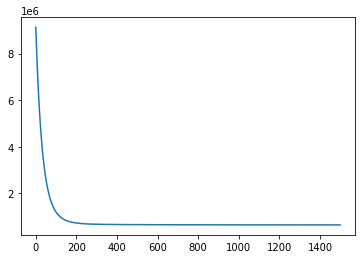

In [9]:
plt.plot(J_storage)
# Plotting of gradient descent J_Storage shows that the function has been minimised through 1500 iterations

In [10]:
beta = np.array([[2070.89941258], [-150.98199108], [-411.63752962], [1402.89693301], [2495.41680077]])

# Predicting the deaths
pred = predict(df_features, beta)

print(pred)
df["predicted deaths model 1"] = pred
display(df)

[[ -651.94530483]
 [ 2246.48761095]
 [ -789.7095666 ]
 [ 3429.70472701]
 [ -656.37509765]
 [  596.05105234]
 [ 5663.64722763]
 [ 2443.34482957]
 [  665.3183446 ]
 [ 1471.607927  ]
 [ 6158.9474471 ]
 [  266.74309522]
 [  342.90565037]
 [-1176.64552232]
 [ 5008.85219672]
 [ 1153.26436074]
 [ -704.52784343]
 [-1337.14606539]
 [ 2621.55573235]
 [14665.90745021]]


,Country,Population (2020),# Diabetic in thousands 20 - 79 y/o (2021),% Age 65+ (2020),# Age 65+,popdensity,hospitalised,deaths,Population_in_1000,Diabetes_per_1000,Elderly_per_1000,predicted deaths model 1
0,Austria,9006398,447.1,19,1711215.62,109,1142,330,9006.398,49.642487,190.0,-651.945305
1,Bulgaria,6948445,492.1,21,1459173.45,64,5093,1311,6948.445,70.821601,210.0,2246.487611
2,Croatia,4105267,212.7,21,862106.07,73,740,162,4105.267,51.811490,210.0,-789.709567
3,Czechia,10708981,791.4,20,2141796.20,139,8482,2989,10708.981,73.900589,200.0,3429.704727
4,Denmark,5792202,309.4,20,1158440.40,137,217,23,5792.202,53.416645,200.0,-656.375098
5,Estonia,1326535,83.9,20,265307.00,31,590,135,1326.535,63.247483,200.0,596.051052
6,France,65273511,3942.9,21,13707437.31,119,24891,3846,65273.511,60.405821,210.0,5663.647228
7,Hungary,9660351,661.4,20,1932070.20,107,6554,2152,9660.351,68.465421,200.0,2443.344830
8,Iceland,341243,20.1,16,54598.88,3,7,0,341.243,58.902307,160.0,665.318345
9,Israel,8655535,536.5,12,1038664.20,400,1328,247,8655.535,61.983459,120.0,1471.607927


#### Evaluation of Model

The metrics chosen to evaluate our model: 
$$r^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

where

$$SS_{res} = \Sigma_{i=1}^n (y_i - \hat{y}_i)^2$$ and $y_i$ is the actual target value and $\hat{y}_i$ is the predicted target value.

$$SS_{tot} = \Sigma_{i=1}^n (y_i - \overline{y})^2$$

where 
$$ \overline{y} = \frac{1}{n} \Sigma_{i=1}^n y_i$$
and $n$ is the number of target values.

Mean Square Error 

$$MSE = \frac{1}{n}\Sigma_{i=1}^n(y^i - \hat{y}^i)^2$$

Adjusted R-Squared 
 $$ Adjusted\ R^2 = 1- \frac{(N-1)(1-R^2)}{N-P-1}$$
where 
N = sample size 
P = number of independent variables 


Root mean square Error is the positive square root of the MSE. 


In [42]:
# Calculating mean squared error
mse = mean_squared_error(target, pred)
rmse = mse**0.5

print("Mean squared error is:", mse)
print("Root Mean squared error is:", rmse)

Mean squared error is: 1301366.4229600504
Root Mean squared error is: 1140.7744838310728


In [43]:
# Calculating r squared
r2 = r2_score(target, pred)

print("R-squared is:",r2)

R-squared is: 0.9102891862875766


In [44]:
def adjusted_r2(targetvariable, predvalues, rsq, n, p):
    coef_num = (1 - rsq) * (n - 1)
    coef_den = n - p - 1
    coef = coef_num / coef_den
    adj_r2 = 1 - coef
    return adj_r2

n = X.shape[0] # Sample size
p = X.shape[1] - 1 # Number of independent variables 
adjusted_rsquared = adjusted_r2(target, pred, r2, n, p)
print("Adjusted R-squared is:", adjusted_rsquared)

Adjusted R-squared is: 0.8863663026309303


Although the R-squared of the model is very high, it may not be the best predictor of the accuracy of the multiple linear regression model. 
Hence, the adjusted R-squared values were calculated which has been adjusted for the number of parameters and it increases if a new variable improves a model more than expected by random chance and vice versa. 
Root mean squared error was also computed from mean square error as it has the same unit as the data set.

The adjusted R-squared values are still quite high. However, the  mean squared error is relatively high and suggests that the predicted data points are signifcantly far from the regression line.
Some of the deaths are also predicted to be negative, which is inevitable since the dataset has a very high range (difference between maximum and minimum deaths)
To improve the model further, some other metrics will be needed to analyse the model.
(Both the R-squared is same as the excel data-analysis tool pack)

To confirm and gain a further understanding of the model residual plots for each of the variables was plotted using the seaborn library. 
Residue is the difference between observed and predicted value. 
Residual plot has the residue value on y-axis and the fitted value (i.e., the independent variable) on the x-axis. 

How to interpret residue plots?

1. A good residue plot has a high density of points near the origin

2. It is also symmetric about the origin

3. The points may not show any patterns as we move across the horizontal axis, which implies that the residues are independent and follow a normal distribution. 

In [45]:
df["residue"] = target - pred
sns.set_theme()

<AxesSubplot:xlabel='popdensity', ylabel='residue'>

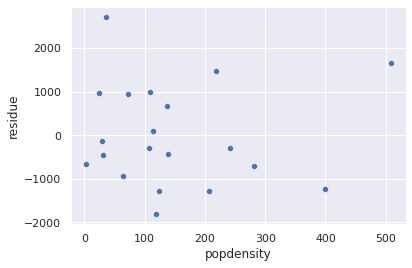

In [46]:
sns.scatterplot(x = "popdensity", y = "residue", data = df)

This residue plot implies a further analysis is needed to study the impact of population density since there are some points very far apart from the origin and there seems to be no symmetry about the origin. 

<AxesSubplot:xlabel='Elderly_per_1000', ylabel='residue'>

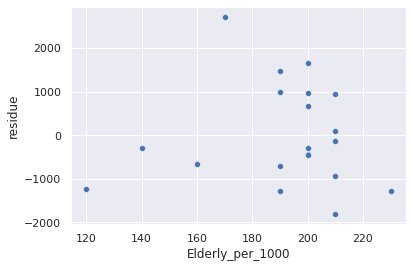

In [47]:
sns.scatterplot(x = "Elderly_per_1000", y = "residue", data = df)

This residue plot implies elderly population may not be an accurate variable and further analysis is needed to study the impact of elderly population per 1000 people since most points are clustered far apart from the origin and there seems to be no symmetry about the origin.

<AxesSubplot:xlabel='Diabetes_per_1000', ylabel='residue'>

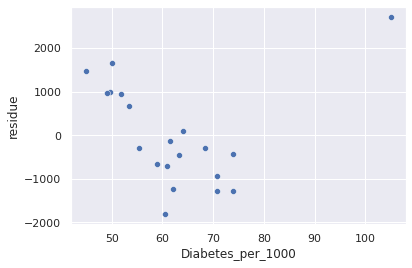

In [48]:
sns.scatterplot(x = "Diabetes_per_1000", y = "residue", data = df)

The trend from the above implies diabeties prevalence may be a fairly reasonable variable, since most points seem to be clustered near the origin. Although further analysis is needed to study the impact of this variable as there seems to be an outlier as seen on the top right.

<AxesSubplot:xlabel='hospitalised ', ylabel='residue'>

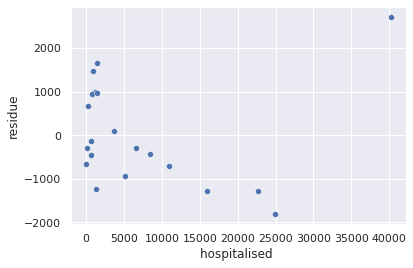

In [49]:
sns.scatterplot(x = "hospitalised ", y = "residue", data = df)

The trend from the above graph implies the number of patients hospitalised on 4th March 2021 may be a fairly reasonable variable since most points are near the origin. Although, further analysis is needed to study the impact of this variable as there seems to be an outlier as seen on the top right.

The USA seems to be an outlier in all plots, however this may be because there is a huge difference in the death count of USA compared to the other countries as it has displayed one of the highest fatality rates during the pandemic. This does not necessarily imply that it does not follow the regression trend. Thus, the USA was not removed, since it enhances the range of populations studied.

To analyse and evalaute the model further apart from the residuals, we used p-value as a metric.

The definition of p-value is as follows: P-value is a probability measure that the data was generated by random chance. It is obtained under the assumption that the null hypothesis is true.

P-value is thus a metric to evalute individual variables in regression models
(coding the p-value is rather complex without machine learning modules and hence, excel p-values have been utilised) 

Interpreting p-values:
The smaller the p-value, the stronger the evidence for rejecting the null hypothesis (H0).
This leads to the guidelines of:

p < 0.001: indicating very strong evidence against H0

p < 0.01: strong evidence

p < 0.05: moderate evidence

p < 0.1: weak evidence or a trend  

p ≥ 0.1: indicating insufficient evidence

Hence, the p-value highlights that the variables "Age 65 and above per 1000 people" and "Population Density (2020)" have insufficient evidence to prove if they are statistically signficant. Whereas, the "Number of Covid-19 Patients hospitalised on March 4" and "Diabetic per 1000 people" show a statistical significance.
This shows indeed a high R-squared value may not be the best metric to determine accuracy.


#### Obtained p-values through excel:

1. Population Density (2020): 0.632

2. Age 65 and above per 1000 people: 0.221

3. Diabetic per 1000 people: 0.025

4. Number of Covid-19 Patients hospitalised on March 4: 0.0002

#### Strengths of current model
1. Model predicts the number of deaths in 2 weeks’ time which is useful for countries so they can prepare and optimize healthcare resources
2. Can be used to predict deaths post 2 weeks from any date
3. High multiple R and adjusted R2 


#### Weaknesses of current model


1. Due to the lack of data availability, data for percentage of elderly aged 65 and above and population density is from 2020, whereas the rest of the data was taken from 2021.
2. High p-values for elderly aged 65 and above and population density  
3. Mean Square Error & root mean square error is relatively high.

Discussing the beta values obtained:

Beta coefficients through code: [[2070.89941258], [-150.98199108], [-411.63752962], [1402.89693301], [2495.41680077]]


Beta coefficients through excel: [[2070.9], [-165.794777806883], [-426.486057089898], [1347.17374356682], [2548.62245100151]]

We standardized the variables in the excel sheet to obtain the same beta coefficients as the code. We see that there is a slight difference in the beta coefficients. This is to be expected due to the different number of decimal places which excel and python uses. Not only that, but we also used the gradient descent function to calculate the minimum beta, which is only an estimate of the minimum beta, and is not the true minimum itself. Therefore, slight deviations from the actual minimum are to be expected.

#### Improved model


The p-value for the total number of people aged 65 and above per 1000 people and population density is greater than 0.1 and is higher than that of the other variables. Thus, we did another multiple linear regression without the population density and the total number of people aged 65 and above per 1000 people. The p-values for the number of individuals with diabetes per 1000 people and the number of people hospitalized due to COVID-19 on a particular day (4th March) were both below 0.05.

#### New predictor variables

-	Number of individuals with diabetes per 1000 people  
-	Number of people hospitalized due to COVID-19 on a particular day (4th March)

In [50]:
# Extract features and target
df_newfeatures, df_target = get_features_targets(df, ["Diabetes_per_1000", "hospitalised "], ["deaths"])

# Normalize using z normalization
df_newfeatures = normalize_z(df_newfeatures)

In [51]:
Xnew = prepare_feature(df_newfeatures)
target = prepare_target(df_target)
beta = np.zeros((Xnew.shape[1], 1))
Jnew = compute_cost(Xnew, target, beta)

print(Jnew)

[[9397432.45]]


In [52]:
iterations = 1500
alpha = 0.01
beta = np.zeros((Xnew.shape[1],1))
beta, J_storage = gradient_descent(Xnew, target, beta, alpha, iterations)

print(beta)
print(J_storage)

[[2070.89941258]
 [1579.52690605]
 [2326.4604115 ]]
[9134858.21306235 8880562.92509721 8634278.55380759 ...  720879.4871655
  720879.14818472  720878.8105269 ]


In [53]:
beta = np.array([[2070.89941258], [1579.52690605] ,[2326.4604115 ]])

# Call predict()
pred_new = predict(df_newfeatures, beta)

# Change target to numpy array
target = prepare_target(df_target)
print(pred_new)
df["predicted deaths model 2"]= pred_new
display(df)

[[ -794.39813323]
 [ 2589.44549729]
 [ -622.05521889]
 [ 3689.24185701]
 [ -543.21480302]
 [  711.96770691]
 [ 5620.60976328]
 [ 2623.44523992]
 [   66.88105445]
 [  720.31958282]
 [ 6749.37232097]
 [  513.31998933]
 [ -345.32165895]
 [ -697.62958167]
 [ 4932.65227116]
 [ 1485.12444053]
 [ -797.04808959]
 [-1410.92694236]
 [ 2676.37346701]
 [14249.82948863]]


,Country,Population (2020),# Diabetic in thousands 20 - 79 y/o (2021),% Age 65+ (2020),# Age 65+,popdensity,hospitalised,deaths,Population_in_1000,Diabetes_per_1000,Elderly_per_1000,predicted deaths model 1,residue,predicted deaths model 2
0,Austria,9006398,447.1,19,1711215.62,109,1142,330,9006.398,49.642487,190.0,-651.945305,981.945305,-794.398133
1,Bulgaria,6948445,492.1,21,1459173.45,64,5093,1311,6948.445,70.821601,210.0,2246.487611,-935.487611,2589.445497
2,Croatia,4105267,212.7,21,862106.07,73,740,162,4105.267,51.811490,210.0,-789.709567,951.709567,-622.055219
3,Czechia,10708981,791.4,20,2141796.20,139,8482,2989,10708.981,73.900589,200.0,3429.704727,-440.704727,3689.241857
4,Denmark,5792202,309.4,20,1158440.40,137,217,23,5792.202,53.416645,200.0,-656.375098,679.375098,-543.214803
5,Estonia,1326535,83.9,20,265307.00,31,590,135,1326.535,63.247483,200.0,596.051052,-461.051052,711.967707
6,France,65273511,3942.9,21,13707437.31,119,24891,3846,65273.511,60.405821,210.0,5663.647228,-1817.647228,5620.609763
7,Hungary,9660351,661.4,20,1932070.20,107,6554,2152,9660.351,68.465421,200.0,2443.344830,-291.344830,2623.445240
8,Iceland,341243,20.1,16,54598.88,3,7,0,341.243,58.902307,160.0,665.318345,-665.318345,66.881054
9,Israel,8655535,536.5,12,1038664.20,400,1328,247,8655.535,61.983459,120.0,1471.607927,-1224.607927,720.319583


#### Evaluation of Improved Model

In [54]:
# Calculating the mean squared error 
msenew = mean_squared_error(target, pred_new)
rmsenew = msenew ** 0.5

print("Mean squared error is:", msenew)
print("Root Mean squared error is:", rmsenew)

Mean squared error is: 1441757.621053792
Root Mean squared error is: 1200.7321187732891


In [55]:
# Calculating r squared
r2new = r2_score(target, pred_new)

print("R-squared is:", r2new)

R-squared is: 0.9006111982921554


In [56]:
# Calculating adjusted r squared

n = Xnew.shape[0] #sample size
p = Xnew.shape[1]-1 #number of independent variables 

adjusted_rsquarednew = adjusted_r2(target, pred_new, r2new, n, p)
print("Adjusted R-squared is:" , adjusted_rsquarednew)

Adjusted R-squared is: 0.8889183980912325


In [57]:
# Comparing the original model and the new one
print("Orignal r2:", r2)
print("New r2:", r2new)

print("Original adjusted r2:", adjusted_rsquared)
print("New adjusted r2:", adjusted_rsquarednew)

print("Original MSE:", mse)
print("New MSE:", msenew)

print("Original RMSE:", rmse)
print("New RMSE:", rmsenew)

Orignal r2: 0.9102891862875766
New r2: 0.9006111982921554
Original adjusted r2: 0.8863663026309303
New adjusted r2: 0.8889183980912325
Original MSE: 1301366.4229600504
New MSE: 1441757.621053792
Original RMSE: 1140.7744838310728
New RMSE: 1200.7321187732891


In [58]:
print("Difference between second version and first version adjusted r-squared:", adjusted_rsquarednew - adjusted_rsquared)
print("Difference between second version and first version rmse:", rmsenew - rmse)

Difference between second version and first version adjusted r-squared: 0.0025520954603022172
Difference between second version and first version rmse: 59.95763494221637


The mean squared error and root mean squared error surprisingly increased in the improved model as compared to the first version, while the R-squared value decreased
However the adjusted R-squared value actually increased by 0.0025520954603022172. 

This highlights our first version of the model was a classical case of over fitting, thus the R-squared value was higher. However, R-squared may not be enough to evalute the model and other metrices such as adjusted r-squared residual plots and p-value are needed.

#### Motivation behind choosing the second model over the first version

The improved model has caused an increase in the adjusted r-squared of our model to 0.8889183980912325, showing that our predictor variables are highly correlated. Moreover, this is further confirmed as the p-values of both diabetes per 1000 people and hospitalised patients lowered after removing the two variables (elderly per 1000 people and population density)
The low individual p-values for diabetes prevalance and the number of hospitalised cases (0.005615, 0.000177 respectively) indicate that there is strong evidence that these predictor variables are correlated to the number of COVID-19 deaths in the next 2 weeks and this rejects the fact that the correlation occured by random chance.

#### Strengths of current model
- Model predicts the deaths 2 weeks from any given date
- High adjusted R2
- Low individual p-values shows variables are statistically significant
- Data is useful and can be used to prepare for future circumstances

#### Weaknesses of current model
- Small number of predictor variables so it would not be useful to predict deaths given other parameters
- MSE and RMSE increased since predicted values deviated away from the true values. However, the p-stat shows that both the variables are significant parameters to predict deaths 2 weeks on.
- There are still negative values of death due to nature of linear regression and an assumption has to be made that negative deaths are 0. This shows the model is not best for countries during the time frame of a relatively stable situation, however can be used to assist nations to optimise healthcare resources during a rampant covid wave or outbreak. 

#### References:

1.	Population - https://www.worldometers.info/world-population/population-by-country/
2.	Diabetic in thousands - https://diabetesatlas.org/data/en/indicators/1/
3.	% Age 65+ - http://wdi.worldbank.org/table/2.1
4.	Covid-19 patients in hospital - https://ourworldindata.org/grapher/current-covid-patients-hospital
5.	Confirmed Covid-19 deaths (Mar 5 - Mar 18) - https://ourworldindata.org/grapher/biweekly-covid-deaths
6.	p-value: https://eurradiolexp.springeropen.com/articles/10.1186/s41747-020-0145-y
7.	residuals: https://www.statisticshowto.com/residual/
8.	mlr: https://www.scribbr.com/statistics/multiple-linear-regression/
9.	mse: https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-squared-error/
10.	reason for choosing %age 65+: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7288963/
11.	reason for choosing #diabetics in thousands: https://dmsjournal.biomedcentral.com/articles/10.1186/s13098-020-00586-4



# Part 2

### Overview of the Problem

Healthcare systems are often overwhelmed during surges in Covid-19 infections, resulting in insufficient intensive care ammenities. Many patients suffering from life-threatening symptoms are not able to get access to lifesaving medical equipment, leaving doctors hard-pressed to choose which patients should get access to the Intensive Care Unit (ICU).

Our goal for this project is to study the parameters which contribute to the development of severe symptoms and build a model to predict which patients entering triage will likely require ICU treatment. This would allow hospitals to better plan manpower and amenity allocations in the short-term and allow healthcare workers to pay closer attention to patients who may have a high risk of developing severe symptoms, hopefully preventing mishaps in planning and reducing the number of deaths.

### Dataset

This dataset was taken from a previous research paper involving patients from Stony Brook University Hospital located in the United States who tested potitive for Covid-19 using PCR between 7 Feb 2020 and 4 May 2020.

Link to the original research paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7651477/

Link to the dataset download: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7651477/bin/peerj-08-10337-s001.csv

A simple function that displays the number of NULL values for each column allows us to check if any values are missing which would prevent the model from converging.

In [59]:
%run dependencies.ipynb

df = pd.read_csv("US_covid_ICU_predictors.csv")
checkNull(df)

Age                             0
Gender..female.0..male1.        0
ethnicity                       0
race                            0
Fever                           0
Cough                           0
SOB                             0
Fatigue                         0
Sputum                          0
Myalgia                         0
Diarrhea                        0
Nausea.Vomiting                 0
Sore.throat                     0
Runny.nose.Nasal.congestion     0
Loss.of.smell                   0
Loss.of.taste                   0
Headahce                        0
Chest.discomfort..chest.pain    0
Asymptomatic                    0
smoking_history                 0
hypertensionhx                  0
diabeteshx                      0
asthmahx                        0
coronaryheartdiseasehx          0
copdhx                          0
heartfailurehx                  0
carcinomahx                     0
immunosuppressionhx             0
ckdhx                           0
ALT           

### Features and Target Preparation

We selected as many features as possible that fulfil the requirement of being easy to collect by hospital triages. Information on the patient's history such as smoking and medical history are also considered easily accessible since it is assumed that patients are aware of these.

Data is split into a training set and test set in a ratio of 4:1 respectively. The features are standartised to allow the model to converge reliably.

In [60]:
# define the independant and dependant variables

nonInvasiveFeatures = [
        'Age', 'Gender..female.0..male1.', 'ethnicity', 'race', 'Fever', 'Cough', 'Fatigue', 'Diarrhea', 'Nausea.Vomiting', 
        'Runny.nose.Nasal.congestion', 'Loss.of.smell', 'Loss.of.taste', 'Headahce', 'Chest.discomfort..chest.pain',
        'Asymptomatic', 'smoking_history', 'hypertensionhx', 'diabeteshx', 'asthmahx', 'coronaryheartdiseasehx', 
        'heartfailurehx', 'immunosuppressionhx', 'HR', 'SpO2', 'Systolic.BP', 'Temperature'
        ]

target = ['ICU.or.not']

# create new pandas dataframes for features and target, training and test set.

df_features, df_target = get_features_targets(df, nonInvasiveFeatures, target)
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, test_size=0.25, random_state=10)
df_features_train_z = normalize_z(df_features_train)
features = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)

print(f'Feature train shape: {df_features_train.shape} | Target train shape: {df_target_train.shape}\n')
print(f'Feature test shape: {df_features_test.shape} | Target test shape: {df_target_test.shape}\n')

Feature train shape: (830, 26) | Target train shape: (830, 1)

Feature test shape: (276, 26) | Target test shape: (276, 1)



### Building the Model

#### Version 1

As this is a classification problem, a logistic regression model is a suitable choice. Our implementaion of the logistic regression model is kept simple as Scikit-Learn already has a much more sophisicated implementation of logictic regression models that is beyond the scope of this project.

The hypothesis of the logistic regression is given as:
$$\mathbf{p}(x) = \frac{1}{1 + e^{-\mathbf{X}\mathbf{b}}}$$

The shape of the input is as follows:
- $\mathbf{b}$: is a column vector for the beta of the parameters
- $\mathbf{X}$: is a matrix containing the data points representing its rows (each row represent a different patient profile) and columns represent features. The number of the columns is same as number of rows in b - 1 (b has one extra row for the y-intercept)

The cost function calculates the errors between predicted value and actual value. It is given by: 

$$J(\beta) = -\frac{1}{m}\left[\Sigma_{i=1}^m y^i \log(p(x^i)) + (1 - y^i) \log(1 - p(x^i))\right]$$

The cost function in logistic regression uses a logarithmic function to ensure a convex function is obtained and there is only a global minimum for cost. This allows to run the gradient descent algorithm. 

The aim of the gradient descent algorithm in logistic regression is to iteratively i.e minimise the cost function. Gradient descent algorithm returns the array of the beta values the model converges at and this  can then be used to predict whether the a new patient will require ICU treatment or not. It also returns J_storage which stores the minimum cost at each iteration
The gradient descent is given by:

$$\mathbf{b} = \mathbf{b} - \alpha\frac{1}{m}\mathbf{X}^T(\mathbf{p} - \mathbf{y}) $$
- `y`: is a vector array for the target i.e whether the patient will be admitted to icu or not. 
- `beta`: is a column vector and is an initial guess.
- `alpha`: is the learning rate
- `num_iters`: is the number of iteration to perform


In [61]:
# set training parameters

iterations = 5000
alpha = 0.05
beta = np.zeros((features.shape[1],1))

# run logistic regression

beta, J_storage = gradient_descent_logreg(features, target, beta, alpha, iterations)

### Evaluating the Model

We evaluated the model based on its ability to correctly predict positive and negative outcomes (that is, whether a patient reqiures ICU or not). The results of the test cases is then recorded as a confusion matrix in the format (A, B), where A is the TRUE outcome of the patient and B is the PREDICTED outcome.

#### Accuracy

Accuracy is defined as the sum of correctly predicted positives and negatives divided by the total number of cases. This metric indicates the probability that the model predicts an outcome correctly, but as we will see later, may not always present an accurate picture.

#### Sensitivity

Sensitivity is defined as the number of correctly predicted positives divided by the total number of actual positives. This metric indicates the probability that the model correctly predicts a positive given that the patient WILL require ICU treatment. It is crucial in situations where making a false positive prediction is extremely detrimental, such as during healthcare diagnosis and building safety simulations.

#### Specificity

Specificity is defined as the number of correctly predicted negatives divided by the total number of actual negatives. This metric indicates the probability that the model correctly predicts a negative given that the patient WILL NOT require ICU treatment. It indicates the confidence users can have in a false prediction actually being false.

#### Precision

Precision is defined as the number of correctly predicted positives divided by the total number of predicted positives. This metric indicates the probability that the model correctly predicts a positive given that the model has predicted a positive. It is the measure of a model's trustworthiness when predicting a positive outcome.

#### The ideal outcome for a model would be for all 4 metrics to be as close as possible to 1.

List of betas: 
[[-1.22121955]
 [-0.07915736]
 [ 0.2529594 ]
 [ 0.12378809]
 [-0.0371186 ]
 [ 0.16342488]
 [-0.01379381]
 [-0.08665539]
 [-0.00186477]
 [-0.01661002]
 [ 0.0168131 ]
 [-0.01653187]
 [ 0.01561123]
 [-0.02338177]
 [-0.04632375]
 [ 0.07197581]
 [-0.02301523]
 [-0.02847581]
 [ 0.10117397]
 [ 0.17837556]
 [ 0.12096795]
 [-0.0463906 ]
 [ 0.01826861]
 [ 0.0658612 ]
 [-0.64200212]
 [-0.10210306]
 [ 0.04014343]]
 
Final cost value: [0.50586204]

Confusion matrix: {(1, 1): 13, (1, 0): 53, (0, 1): 9, (0, 0): 201}

Accuracy: 0.775
Sensitivity: 0.197
Specificity: 0.957
Precision: 0.591


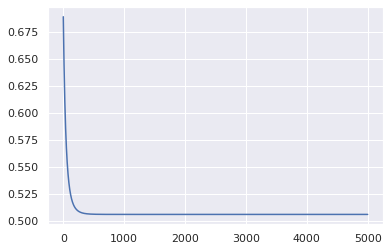

In [62]:
evaluateModel(df_features_test, df_target_test, beta)

The model exhibits relatively high accuracy, but extremely poor sensitivity. It is extremely specific, only wrongly predicting a positive outcome when in fact it should be negative 9 out of 210 times.

### Improving the Model

#### Version 2 - Targeted feature selection

We recognised the possibility of the model falling victim to overfitting, that is, when the model is trained with unimportant features, it has a tendency to learn how to recognise the training data set well, but is weak at predicting when given new data. Hence, we wrote a function to sort the relevance of the features based on the absolute values of their correlation with the target.

In [63]:
findCor(df, 'ICU.or.not', method='pearson')

,ICU.or.not
ICU.or.not,1.000000
CRP,0.269973
SpO2,0.260069
RR,0.178695
Ferritin,0.133587
Gender..female.0..male1.,0.117531
Lymphocyte,0.114704
LDH,0.104551
SOB,0.100605
carcinomahx,0.074057


We then retrained the model based on the top 8 features which satisfy our constraint of being information that is easily collected.

These features are: SpO2, Gender, Race, Systolic blood pressure, Heart rate, Age, Asthma and Temperature

Feature train shape: (830, 8) | Target train shape: (830, 1)

Feature test shape: (276, 8) | Target test shape: (276, 1)

List of betas: 
[[-1.20490626]
 [-0.63274135]
 [ 0.27600985]
 [-0.03099477]
 [-0.10193614]
 [ 0.03988464]
 [-0.04967087]
 [ 0.19027957]
 [ 0.05221086]]
 
Final cost value: [0.51150121]

Confusion matrix: {(1, 1): 12, (1, 0): 54, (0, 1): 7, (0, 0): 203}

Accuracy: 0.779
Sensitivity: 0.182
Specificity: 0.967
Precision: 0.632


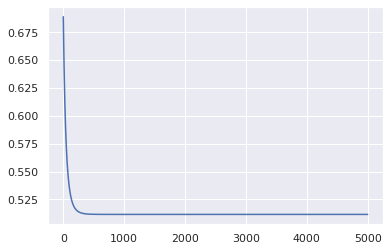

In [64]:
# New features selected based on the table generated by the findCor() function

newFeatures = [
            'SpO2', 'Gender..female.0..male1.', 'race', 'Systolic.BP', 'HR', 'Age', 'asthmahx', 'Temperature'
            ]
target = ['ICU.or.not']

# prepare data

features, target, features_test, target_test= prepareData(df, newFeatures, target, test_size=0.25, random_state=10)

# run logistic regression

iterations = 5000
alpha = 0.05
weight = 1
beta = np.zeros((features.shape[1],1))

beta, J_storage = gradient_descent_logreg(features, target, beta, alpha, iterations)

# evaluate model

evaluateModel(features_test, target_test, beta)

We notice in this example, the accuracy, specificity and precision of the model improved slighty with intelligent feature selection. 

           Version 1    Version 2

        ACC: 0.775   |   0.779

        SEN: 0.197   |   0.182

        SPE: 0.957   |   0.967

        PRE: 0.591   |   0.632

However, the gains are very marginal, and different random seed inputs used to split the training and test sets can result in the original model outperforming version 2.

### Further improvements to the model

#### Version 3 - Outcome bias

Both version 1 and 2 suffer from low sensitivity. This is inherent to the nature of the problem, which has a much higher prevalance of negative outcomes than positive one. Hence, we sought to improve this by oversampling the data to increase the number of instances or positive outcomes to bias the model to predicting the need for ICU.

After oversampling, it can be see from the console output print statements that number of rows in the training data has increased from the original.

#### Percentage imbalance

The percentage imbalance value printed in the console output indicates the percentage occurence of the original 'strong' variable. For example, a percentage imbalance of 90% indicates that the original dataset had 90% strong outcome and 10% weak outcome.

#### The Bias parameter

The 'bias' parameter in oversampling adjusts the extent of oversampling. 1 means outcomes will match each other in size. Bias > 1 shifts the bias towards the weaker outcome, while values < 1 will reverse the effects of oversampling (but will never result in the weaker objective becoming even weaker). If the bias is too small, the program will raise a ValueError, and the user has to increase bias and try again.

Users can tweak this value based on the objective of the model, such as matching the sensitivity and specificity or to maximize sensitivity.

Percentage imbalance: 75.5%
Feature train shape: (1619, 8) | Target train shape: (1619, 1)

Feature test shape: (276, 8) | Target test shape: (276, 1)

List of betas: 
[[-0.04003033]
 [-0.6155684 ]
 [ 0.25805806]
 [ 0.07278857]
 [-0.13496053]
 [ 0.01804762]
 [-0.02423919]
 [ 0.11547592]
 [ 0.09750459]]
 
Final cost value: [0.64114598]

Confusion matrix: {(1, 1): 38, (1, 0): 19, (0, 1): 77, (0, 0): 142}

Accuracy: 0.652
Sensitivity: 0.667
Specificity: 0.648
Precision: 0.330


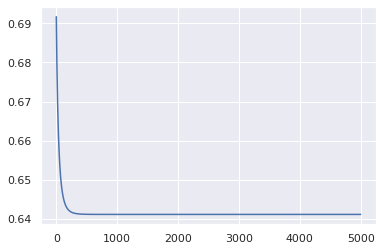

In [65]:
newFeatures = [
            'SpO2', 'Gender..female.0..male1.', 'race', 'Systolic.BP', 'HR', 'Age', 'asthmahx', 'Temperature'
            ]
target = ['ICU.or.not']

# prepare data

features, target, features_test, target_test= prepareData(df, newFeatures, target, oversampleData=True, bias=0.94, test_size=0.25, random_state=0)

# run logistic regression
    
iterations = 5000
alpha = 0.05
weight = 1
beta = np.zeros((features.shape[1],1))

beta, J_storage = gradient_descent_logreg(features, target, beta, alpha, iterations)

# evaluate model

evaluateModel(features_test, target_test, beta)

Here is a summary of the results for the first 2 versions along side the result for version 3.

           Version 1   Version 2   Version 3

        ACC: 0.775   |   0.779   |   0.652

        SEN: 0.197   |   0.182   |   0.667

        SPE: 0.957   |   0.967   |   0.648

        PRE: 0.591   |   0.632   |   0.330
        
The metrics for version 3 are much more balanced as opposed to the previous versions. Most notably, the model's sensitivity has drastically increased, which is the intended effect of this improvement.

### Discussion and Analysis

Version 2 of the model with more intelligent feature selection had very marginal improvements over the first version. Although both models have a very high specificity, they lack in sensitivity. This may be problematic in the context of hospitals, where doctors may be led to falsely believe that certain patients are not at risk of developing severe symptoms which may have severe implications if they do end up requiring ICU.

After performing oversampling on the dataset to artificially increase the number of positive outcomes, the new model leans much more strongly in favour of predicting positives.

This results in version 3 featuring a slightly lower accuracy and significantly lower specificity. However, we believe that this change still increases the model's usefulness.

#### A few notable strengths of this model are:

1) Modular and can easily be retrained with new data

2) Users are guided in the decision making process of selecting relevant features based on their correlation to the target with the help of the correlation finder, reducing the time needed for trail-and-error in datasets with many variables.

3) Bias factor in the oversampling function further allows them to train the model based to favour predicting a certain outcome.

#### However, there are several limitations worth noting.

1) The dataset lacks information about the duration the patient was admitted into the hospital before requiring intensive care. A more refined model would be able to predict the likeihood of requiring intensive care within a time interval, which would indubitably be more useful for resource planning.

2) The simplistic regression model, namely in the way cost is computed, is likely to be the greatest limitation of the model. However, this can easily be changed with the aid of built in packages such as Scikit-Learn's LogisticRegression.

#### Final words

In conclusion, this model shows some potential at effectively predicting the likelihood of a patient requiring ICU which can help hospitals to objectively classify patients entering and allow them to better plan resources and keep a watchful eye over patients who are at higher risk. It is modular and can easily be and customised according to the needs of different hospitals with different type of available parameters. Users are also guided to select features which are most important and can tune the model to favour certain outcomes.